1. Load the dataset into a Pandas DataFrame

In [1]:
#Load the dataset into a Pandas DataFrame
import pandas as pd
df = pd.read_csv('sales data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1000 non-null   object 
 1   Store Location  1000 non-null   object 
 2   Department      1000 non-null   object 
 3   Product         1000 non-null   object 
 4   Total           1000 non-null   float64
 5   Payment         1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB
None


2. Print the first five records of the dataset

In [2]:
# view the first five rows
df.head()

,Date,Store Location,Department,Product,Total,Payment
0,01-05-2019,Yangon,Health,Beauty,548.97,Ewallet
1,03-08-2019,Naypyitaw,Electronic,Accessories,80.22,Cash
2,03-03-2019,Yangon,Home,Lifestyle,340.53,Credit card
3,1-27-2019,Yangon,Health,Beauty,489.05,Ewallet
4,02-08-2019,Yangon,Sports,Travel,634.38,Ewallet


3. Find the most used payment method  in each store

In [3]:
# Group the data by store and payment method, count the number of transactions, and get the index with the highest count for each store
most_used_payment_method = df.groupby(['Store Location', 'Payment']).size().groupby(level=0).idxmax()

# Print the most used payment method for each store
print(most_used_payment_method)

Store Location
Mandalay     (Mandalay, Ewallet)
Naypyitaw      (Naypyitaw, Cash)
Yangon         (Yangon, Ewallet)
dtype: object


4. Find the total amount of sales for each department and product

In [6]:
# Group the data by department and product, and calculate the total sales amount for each group
total_sales = df.groupby(['Department', 'Product'])['Total'].sum()

# Print the total sales amount for each department and product
print(total_sales)

Department  Product    
Electronic  Accessories    54337.64
Fashion     Accessories    54306.03
Food        Beverages      56144.96
Health      Beauty         49193.84
Home        Lifestyle      53861.96
Sports      Travel         55123.00
Name: Total, dtype: float64


5. Find the average Payment for each store

In [7]:
# Group the DataFrame by store and calculate the average payment
avg_payment = df.groupby('Store Location')['Total'].mean()

# Print the result
print(avg_payment)

Store Location
Mandalay     319.873494
Naypyitaw    337.100183
Yangon       312.354618
Name: Total, dtype: float64


6. Find the highest-selling Department in each store

In [8]:
# Group the DataFrame by store and department and calculate the total sales
total_sales = df.groupby(['Store Location', 'Department'])['Total'].sum()

# Find the highest-selling department in each store
highest_selling = total_sales.groupby('Store Location').idxmax()

# Print the result
print(highest_selling)

Store Location
Mandalay     (Mandalay, Sports)
Naypyitaw     (Naypyitaw, Food)
Yangon           (Yangon, Home)
Name: Total, dtype: object


7. Create a bar graph comparing the total sales of each store

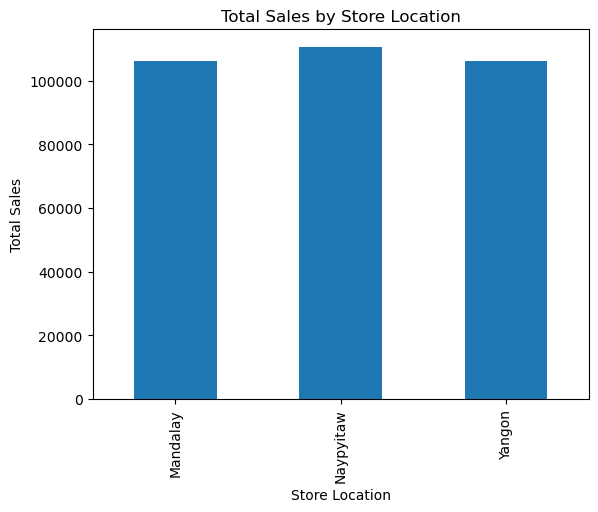

In [9]:
#Create a bar graph comparing the total sales of each store

import matplotlib.pyplot as plt

# Group the DataFrame by store and calculate the total sales
total_sales = df.groupby('Store Location')['Total'].sum()

# Create a bar graph of the total sales for each store
total_sales.plot(kind='bar')

# Add labels and title to the graph
plt.xlabel('Store Location')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store Location')

# Show the graph
plt.show()


8. Find the total sales of each department in each store

In [10]:
# Group the data by department and product, and calculate the total sales amount for each group
total_sales = df.groupby(['Department', 'Store Location'])['Total'].sum()

# Print the total sales amount for each department and product
print(total_sales)

Department  Store Location
Electronic  Mandalay          17051.52
            Naypyitaw         18968.99
            Yangon            18317.13
Fashion     Mandalay          16413.38
            Naypyitaw         21560.11
            Yangon            16332.54
Food        Mandalay          15214.93
            Naypyitaw         23766.88
            Yangon            17163.15
Health      Mandalay          19980.70
            Naypyitaw         16615.35
            Yangon            12597.79
Home        Mandalay          17549.21
            Naypyitaw         13895.54
            Yangon            22417.21
Sports      Mandalay          19988.26
            Naypyitaw         15761.99
            Yangon            19372.75
Name: Total, dtype: float64


9.Find the average mode of each payment method in each store

In [11]:
# Group the DataFrame by payment and calculate the average payment mode
avg_mode = df.groupby('Payment')['Total'].mean()

# Print the result
print(avg_mode)

Payment
Cash           326.182442
Credit card    324.010579
Ewallet        318.821391
Name: Total, dtype: float64


10.Find the top 10 departments based on the average sales

In [12]:
# Group the DataFrame by department and calculate the average sales
avg_sales = df.groupby('Department')['Total'].mean()

# Sort the departments in descending order based on their average sales
top_departments = avg_sales.sort_values(ascending=False).head(10)

# Print the top 10 departments based on the average sales
print(top_departments)

Department
Home          336.637250
Sports        332.066265
Health        323.643684
Food          322.672184
Electronic    319.633176
Fashion       305.090056
Name: Total, dtype: float64


11.Create a line graph comparing the average sales of the top 10 departments

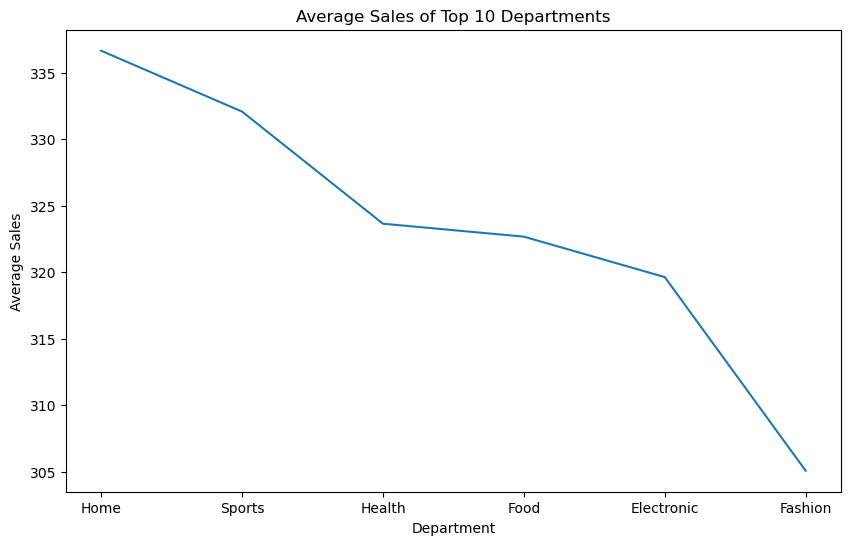

In [13]:
# Group the DataFrame by department and calculate the average sales
avg_sales = df.groupby('Department')['Total'].mean()

# Sort the departments in descending order based on their average sales
top_departments = avg_sales.sort_values(ascending=False).head(10)

# Plot a line graph of the average sales for the top 10 departments
top_departments.plot(kind='line', figsize=(10, 6))

# Set the title and axis labels
plt.title('Average Sales of Top 10 Departments')
plt.xlabel('Department')
plt.ylabel('Average Sales')

# Display the line graph
plt.show()


12.Create a pivot table comparing the average of each payment method in each department

In [14]:

# Create a pivot table of the average sales for each payment method in each department
pivot_table = df.pivot_table(values='Total', index='Department', columns='Payment', aggfunc='mean')

# Display the pivot table
print(pivot_table)

Payment           Cash  Credit card     Ewallet
Department                                     
Electronic  291.972113   335.392174  343.010943
Fashion     309.014035   309.555714  297.801692
Food        337.033509   331.725246  298.193036
Health      350.798980   319.389800  302.550943
Home        364.490196   310.735333  332.654219
Sports      319.896271   336.156792  341.348333


13.Create a 1-dimensional Numpy array of size 10, filled with zeros.

In [15]:
import numpy as np

arr = np.zeros(10)
print (arr)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


14.Generate an array with 10 evenly spaced values between 0 and 1

In [16]:
arr = np.linspace(0, 1, 10)
print(arr)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


15.Convert a list into a Numpy array and find its shape, size, and dimensions.

In [17]:
my_list = [1, 2, 3, 4, 5]
my_array = np.array(my_list)

print("Array:", my_array)
print("Shape:", my_array.shape)
print("Size:", my_array.size)
print("Dimensions:", my_array.ndim)

Array: [1 2 3 4 5]
Shape: (5,)
Size: 5
Dimensions: 1


16.Extract all the odd numbers from a given Numpy array and store them in another array.

In [18]:
# create a numpy array with values
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# extract odd values using boolean indexing
odd_arr = arr[arr % 2 == 1]

# print the extracted odd values and their shape
print("Odd values:", odd_arr)
print("Shape of odd array:", odd_arr.shape)

Odd values: [1 3 5 7 9]
Shape of odd array: (5,)


17.How to sort a NumPy array along a specific axis?

In [19]:
# Create a 2D NumPy array
arr = np.array([[3, 2, 1], [6, 5, 4]])

# Sort along the rows (axis=1)
sorted_arr = np.sort(arr, axis=1)
print(sorted_arr)

[[1 2 3]
 [4 5 6]]


18.How do you sort a structured NumPy array by multiple fields?

In [20]:
# Create a structured NumPy array
dtype = [('name', 'U10'), ('age', int), ('salary', float)]
data = [('Alice', 25, 50000.0), ('Bob', 30, 60000.0), ('Charlie', 20, 45000.0)]
arr = np.array(data, dtype=dtype)

# Sort by age and then by salary
sorted_arr = np.sort(arr, order=['age', 'salary'])

print(sorted_arr)


[('Charlie', 20, 45000.) ('Alice', 25, 50000.) ('Bob', 30, 60000.)]


19.Given a Numpy array a of shape (m, n), how would you calculate the row-wise mean and column-wise mean of the array?

In [21]:
# create a numpy array
a = np.array([[1,2,3], [4,5,6], [7,8,9]])

# calculate row-wise mean
row_mean = np.mean(a, axis=1)

print("Row-wise Mean: ", row_mean)

# calculate column-wise mean
column_mean = np.mean(a, axis=0)

print("Column-wise Mean: ", column_mean)

Row-wise Mean:  [2. 5. 8.]
Column-wise Mean:  [4. 5. 6.]


20.Given a Numpy array a of shape (m, n), how would you find the element with the maximum absolute value in each row and return the indices of those elements?

In [22]:
# create a numpy array
a = np.array([[1,-2,3], [-4,5,6], [7,8,-9]])

# find the indices of the element with the maximum absolute value in each row
max_abs_idx = np.abs(a).argmax(axis=1)

print("Indices of elements with maximum absolute value in each row: ", max_abs_idx)

Indices of elements with maximum absolute value in each row:  [2 2 2]
